###  Create a plot of conductance as a function of energy for the given 2-D nanowire system, based on a simple tight-binding model.


**Kwant**:

Kwant is a free (open source) Python package for numerical calculations on tight-binding models.Kwant is often faster than other available codes, even those entirely written in the low level FORTRAN and C/C++ languages.

Tight-binding models can describe a vast variety of systems and phenomena in quantum physics. Therefore, Kwant can be used to simulate

metals, graphene, topological insulators, quantum Hall effect, superconductivity, spintronics, molecular electronics, and any combination of the above, wave functions, even out-of-equilibrium local quantities. 

In [4]:
import kwant
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


### Define the nanowire structure(2D, rectangle)

We create a function called **create_nanowire** to define the nanowire structure, and inside this function, we define three sub-functions:

-square_lattice determines if a site is within the nanowire.

-hopping defines the hopping term between two neighboring sites.

-onsite defines the onsite energy of each site.

In [25]:
def create_nanowire(length, width):  #  define the nanowire structure 
    
    def square_lattice(pos): # to determine if a site is within the nanowire. 
        x, y = pos
        return 0 <= x < length and 0 <= y < width

    def hopping(site1, site2):  # defines the hopping term between two neighboring sites.
        return -1

    def onsite(site):  # defines the onsite energy of each site
        return 4

# Next, we create a square lattice and a Kwant Builder

    lat = kwant.lattice.square()
    syst = kwant.Builder()
    


# set the onsite energy and hopping term for the lattice using the onsite and hopping functions

    syst[lat.shape(square_lattice, (0, 0))] = onsite
    syst[lat.neighbors()] = hopping

    # define the leads with translational symmetry in the x-direction:
    
    lead_symmetry = kwant.TranslationalSymmetry((-1, 0))
    lead = kwant.Builder(lead_symmetry)

# Define a shape function for the lead:

    def lead_shape(pos):
        x, y = pos
        return 0 <= y < width

# set the onsite energy and hopping term for the lead

    lead[lat.shape(lead_shape, (0, 0))] = onsite
    lead[lat.neighbors()] = hopping

# attach the leads to the nanowire:

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst

#### define a function conductance to calculate the conductance for a range of energies

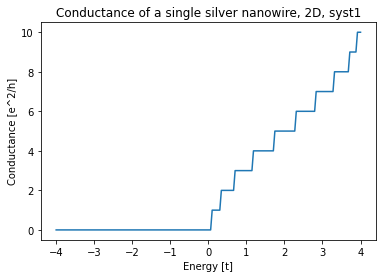

In [26]:

def conductance(syst, energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))
    return data

# create the nanowire by calling the create_nanowire function and finalize the system

length, width = 100, 10
nanowire = create_nanowire(length, width)
syst1 = nanowire.finalized()

# generate a list of energies, calculate the corresponding conductance, and plot the results

energies = np.linspace(-4, 4, 200)
transmissions = conductance(syst1, energies)


plt.figure()
plt.plot(energies, transmissions)
plt.xlabel('Energy [t]')
plt.ylabel('Conductance [e^2/h]')
plt.title('Conductance of a single silver nanowire, 2D, syst1')
plt.show()


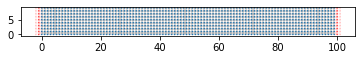

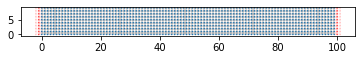

In [27]:
kwant.plot(syst1)

We used simple tight-binding model to describe the electronic structure of the silver nanowire. The plot shows the conductance of the silver nanowire as a function of energy. Conductance is a measure of how easily **electrical current** $I$ can flow through a material.  

We use Atomic Units for mathematical simplification.

The x-axis of the plot represents the energy of electrons in the system, given in units of the hopping term 't'. The y-axis shows the conductance in units of e^2/h, where 'e' is the elementary charge and 'h' is the Planck constant. The conductance quantifies how many channels are available for electron transport at a given energy level.

The plot demonstrates how the conductance of the silver nanowire changes as a function of energy. At specific energy levels, the conductance is higher, meaning that the nanowire allows for easier electron transport at those energies. In contrast, at other energy levels, the conductance is lower, indicating that electron transport is less efficient.

### Improvement

This is a simple tight-binding model, which may not accurately represent the real behavior of a silver nanowire. For a more realistic representation, we should also consider specific orbitals and their interactions, which need a more accurate model and computational resources. 

In [ ]:
# create the nanowire by calling the create_nanowire function and finalize the system

length=[100, 1000, 10000, 100000]
width = 10

for each in length:
    nanowire = create_nanowire(each, width)
    syst = nanowire.finalized()
    energies = np.linspace(-2, 4, 100)
    transmissions = conductance(syst, energies)
    plt.figure()
    plt.plot(energies, transmissions)
    plt.xlabel('Energy [t]')
    plt.ylabel('Conductance [e^2/h]')
    plt.title('Conductance of a single silver nanowire')
    plt.show()

### 3D cuboid model of a single AgNW.

In [28]:
def create_nanowire(length, width, height):
    def cubic_lattice(pos):
        x, y, z = pos
        return 0 <= x < length and 0 <= y < width and 0 <= z < height

    def hopping(site1, site2):
        return -1

    def onsite(site):
        return 6
    
    lat = kwant.lattice.general(np.eye(3))
    syst = kwant.Builder()
    
    syst[lat.shape(cubic_lattice, (0, 0, 0))] = onsite
    syst[lat.neighbors()] = hopping

    lead_symmetry = kwant.TranslationalSymmetry((-1, 0, 0))
    lead = kwant.Builder(lead_symmetry)

    def lead_shape(pos):
        x, y, z = pos
        return 0 <= y < width and 0 <= z < height

    lead[lat.shape(lead_shape, (0, 0, 0))] = onsite
    lead[lat.neighbors()] = hopping

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst

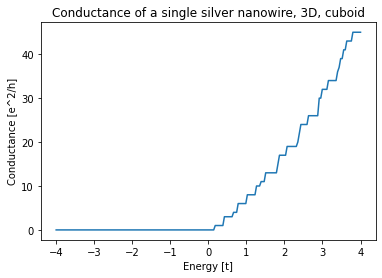

In [29]:
def conductance(syst, energies):
    data=[]
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))
    return data

length, width, height = 100, 10,10


nanowire = create_nanowire(length, width, height)
syst2 = nanowire.finalized()

energies = np.linspace(-4, 4, 200)
transmissions = conductance(syst2, energies)

plt.figure()
plt.plot(energies, transmissions)
plt.xlabel('Energy [t]')
plt.ylabel('Conductance [e^2/h]')
plt.title('Conductance of a single silver nanowire, 3D, cuboid')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: The 'renderer' parameter of do_3d_projection() was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/kwant/_plotter.py:160: MatplotlibDeprecationWarning: 
The 'renderer' parameter of do_3d_projection() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'renderer', they should be passed as keyword, not positionally.
  super().do_3d_projection(renderer)


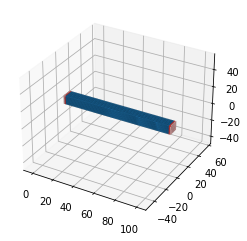

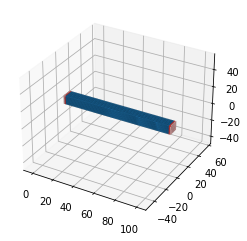

In [30]:
kwant.plot(syst2)

### Cylinder model of a single AgNW.

In [31]:
def create_cylindrical_nanowire(length, radius):
    def cylinder_lattice(pos):
        x, y = pos
        r = np.sqrt(y**2)
        return 0 <= x < length and r < radius

    def hopping(site1, site2):
        return -1

    def onsite(site):
        return 4

    lat = kwant.lattice.square()
    syst = kwant.Builder()

    syst[lat.shape(cylinder_lattice, (0, 0))] = onsite
    syst[lat.neighbors()] = hopping

    lead_symmetry = kwant.TranslationalSymmetry((-1, 0))
    lead = kwant.Builder(lead_symmetry)

    def lead_shape(pos):
        x, y = pos
        r = np.sqrt(y**2)
        return r < radius

    lead[lat.shape(lead_shape, (0, 0))] = onsite
    lead[lat.neighbors()] = hopping

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst


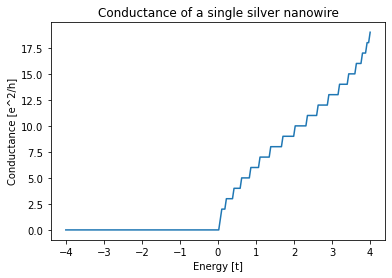

In [32]:
def conductance(syst, energies):
    data=[]
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))
    return data

length, radius = 100, 10

nanowire = create_cylindrical_nanowire(length, radius)
syst3 = nanowire.finalized()




energies = np.linspace(-4, 4, 200)
transmissions = conductance(syst3, energies)

plt.figure()
plt.plot(energies, transmissions)
plt.xlabel('Energy [t]')
plt.ylabel('Conductance [e^2/h]')
plt.title('Conductance of a single silver nanowire')
plt.show()


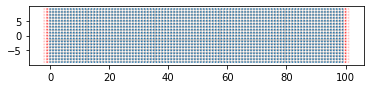

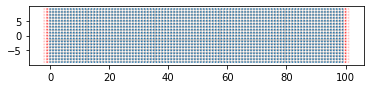

In [33]:
kwant.plot(syst3)

### Simulate a system with one more AgNWs.

/opt/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


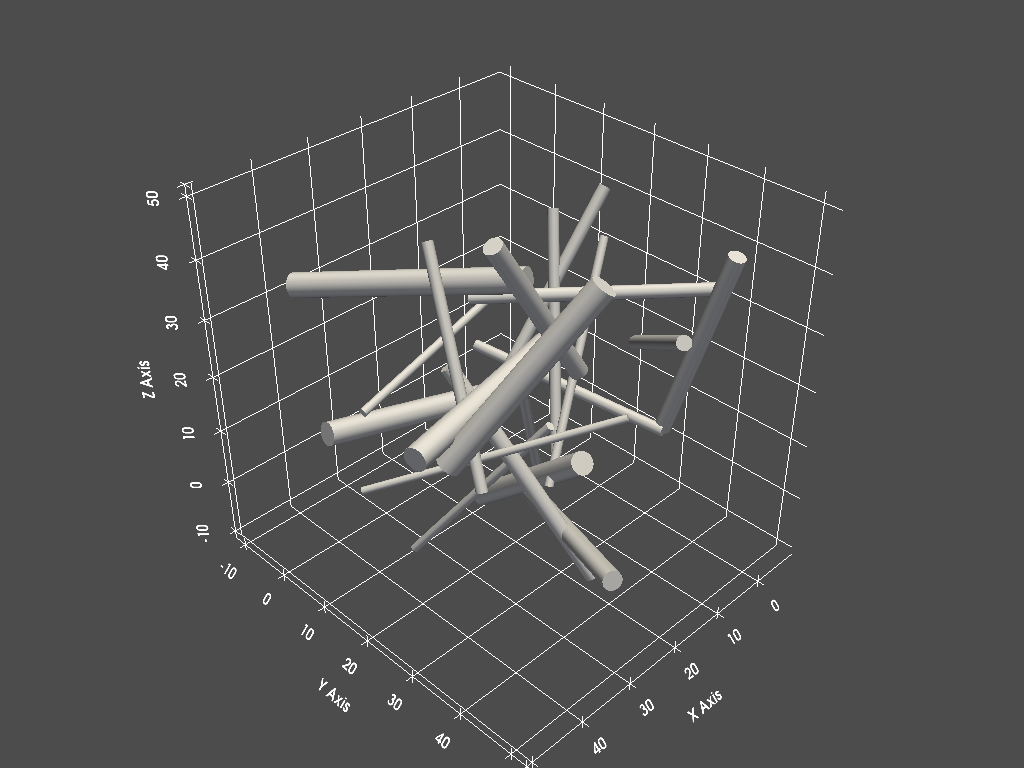

In [10]:
import pyvista as pv #pyvista  for 3D visualization


# Create a function to generate a cylinder vector

def create_cylinder(radius, height, center, direction):
    cylinder = pv.Cylinder(center=center, direction=direction, radius=radius, height=height)
    return cylinder



def random_nanowire_system(num_cylinders, min_radius, max_radius, min_height, max_height, bounds):
    nanowires = pv.MultiBlock() # the system or container
    
    # generate random parameters for each cylinder and creates it using the create_cylinder function.
    
    for _ in range(num_cylinders):
        radius = np.random.uniform(min_radius, max_radius)
        height = np.random.uniform(min_height, max_height)
        center = np.random.uniform(bounds[0], bounds[1], size=(3,))
        
        direction = np.random.uniform(-1, 1, size=(3,))
        direction /= np.linalg.norm(direction)  # Normalize the direction vector
        nanowire = create_cylinder(radius, height, center, direction)
        
        nanowires.append(nanowire) # appends the created cylinder to a pyvista.MultiBlock object, which is a container
        
    return nanowires

num_cylinders = 20 # how many AgNWs in the system

# generate cylinders within these parameters randomly

min_radius, max_radius = 0.5, 2  #[0.5,1.5]

min_height, max_height = 30, 40 #[10,20]

bounds = np.array([[0, 0, 0], [40, 40, 40]]) # boundary conditions

# the main function

nanowire_system = random_nanowire_system(num_cylinders, min_radius, max_radius, min_height, max_height, bounds)

# Visualize the nanowire system
# To visualize the generated nanowire system, we create a pyvista.Plotter object.
# Loop through the cylinders in the nanowire_system and add each of them to the plotter using the add_mesh method. 
# We enable smooth_shading for better visual appearance. 

plotter = pv.Plotter()
for nanowire in nanowire_system:
    plotter.add_mesh(nanowire, smooth_shading=True)

plotter.show_grid()
plotter.show()
